## Healthcare Supply Chain Optimization

This notebook is dedicated to analyzing and optimizing the healthcare supply chain for a group of hospitals in Spain. The tasks include establishing a purchase plan for 2023, predicting expenses, detecting purchase patterns, and evaluating environmental impacts.


### Data Loading and Preprocessing

The first step is to load the data and perform necessary preprocessing steps like handling missing values and converting date strings to datetime objects.


### Exploratory Data Analysis (EDA)

This section will involve analyzing trends over time, the most frequently purchased products, price and cost trends, and the distribution of purchase types.


### Forecasting Purchase Expenses and Demand

In this part, we will apply time series analysis and forecasting models to predict future expenses and product demand.


### Detecting Purchase Patterns

This section will use clustering or association rule mining to identify patterns in purchasing behavior.


### Evaluating Environmental Impact

Here, we will assess the potential impact of different purchasing strategies on the environment, especially focusing on CO2 emissions.


### Visualizations

This part will include creating charts and graphs to visualize findings and trends effectively.


### Summary and Recommendations

Finally, we will summarize the key findings and propose recommendations for the purchase plan based on the analysis.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the data
data= pd.read_excel('../assets/consumo_material_clean.xlsx')
# Convert 'FECHAPEDIDO' to datetime
data['FECHAPEDIDO'] = pd.to_datetime(data['FECHAPEDIDO'], format='%d/%m/%y', errors='coerce')
# Display the first few rows
data.head()


,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
0,E99808,2023-01-01,1595724/23,178567.1,60,10,62.590000,375.540000,Compra menor,1-2-60,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3
1,B41691,2016-02-01,72714/16,400403,40,10,102.803729,411.214916,Compra menor,0-10-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...
2,E64543,2016-02-01,71961/16,403770,20,5,12.100000,48.400000,Compra menor,0-4-111,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18
3,E65007,2016-02-01,72773/16,20415,100,50,215.325000,430.650000,Concurso,0-10-1,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11
4,E64911,2017-02-01,86159/17,20701,300,300,792.000000,792.000000,Concurso,0-6-1,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6


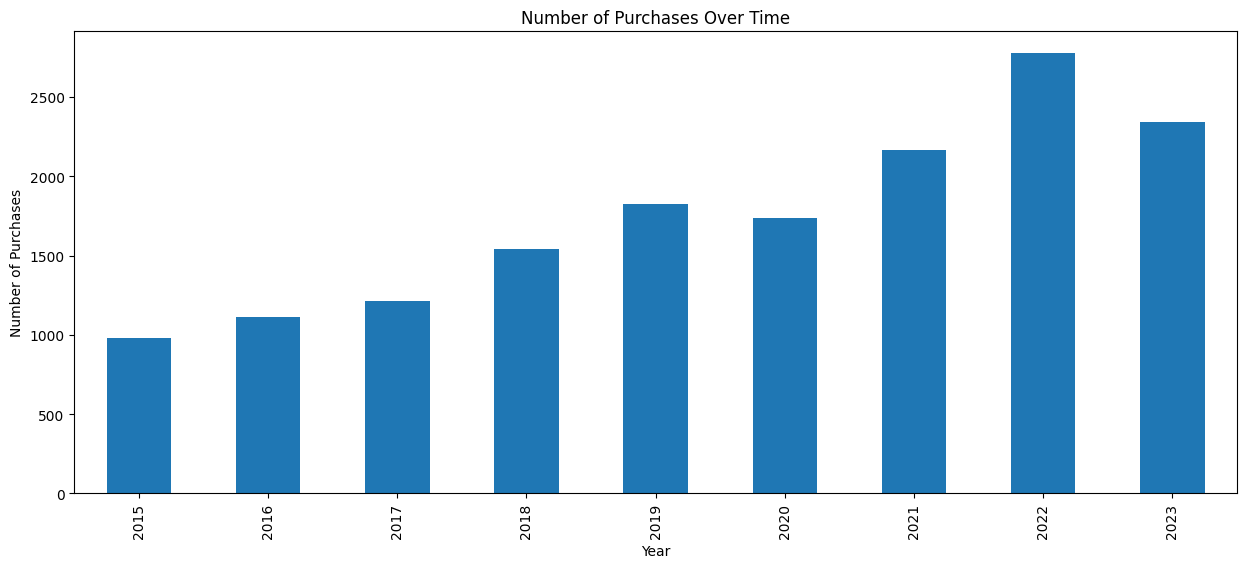

In [5]:
# EDA: Analyzing purchases over time
plt.figure(figsize=(15, 6))
data['FECHAPEDIDO'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Purchases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.show()


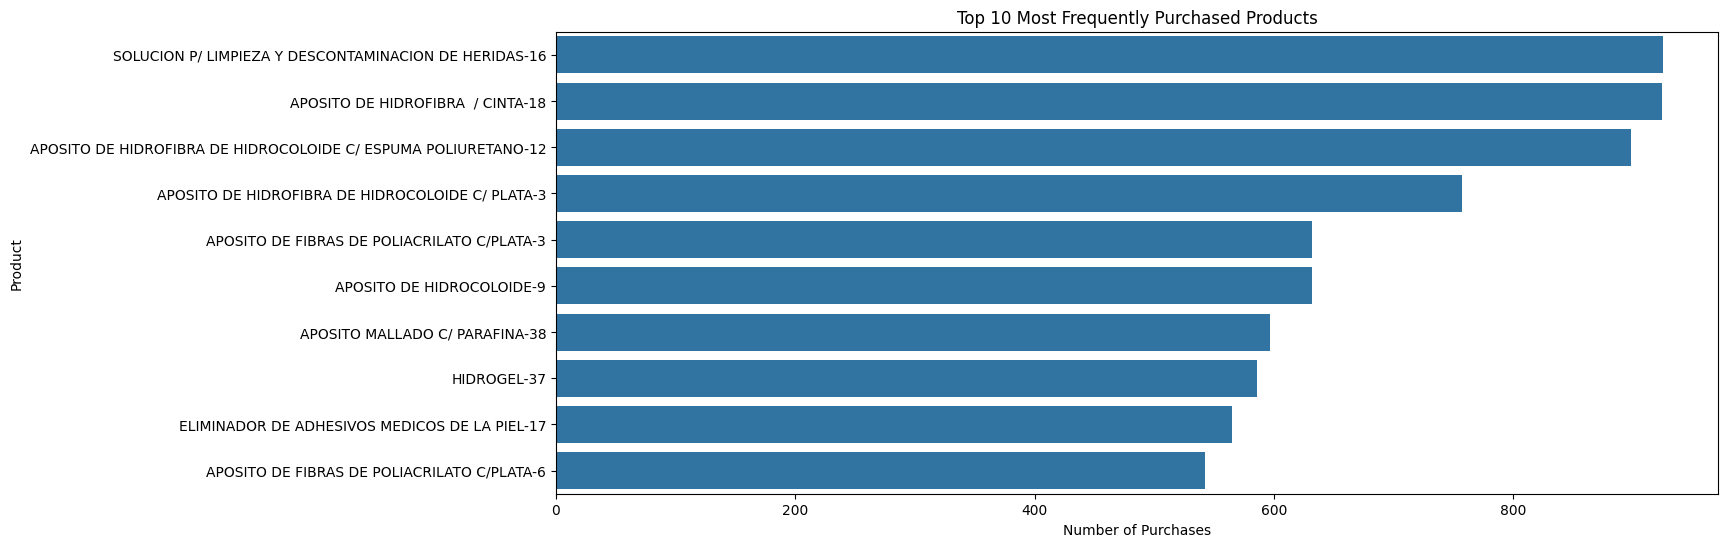

In [6]:
# EDA: Analyzing the most frequently purchased products
top_products = data['PRODUCTO'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product')
plt.show()


In [7]:
# More EDA, forecasting, pattern detection, environmental impact assessment, and visualization code will go here


In [ ]:
# Summary and recommendations based on the analysis


In [8]:

# Data Preprocessing
# -------------------
# Handling missing values in 'TGL'
data['TGL'] = data['TGL'].fillna('Unknown')

# Converting 'CODIGO', 'NUMERO', and 'REFERENCIA' to categorical
data['CODIGO'] = data['CODIGO'].astype('category')
data['NUMERO'] = data['NUMERO'].astype('category')
data['REFERENCIA'] = data['REFERENCIA'].astype('category')

# Displaying the updated DataFrame
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15698 entries, 0 to 15697
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CODIGO                     15698 non-null  category      
 1   FECHAPEDIDO                15698 non-null  datetime64[ns]
 2   NUMERO                     15698 non-null  category      
 3   REFERENCIA                 15698 non-null  category      
 4   CANTIDADCOMPRA             15698 non-null  int64         
 5   UNIDADESCONSUMOCONTENIDAS  15698 non-null  int64         
 6   PRECIO                     15698 non-null  float64       
 7   IMPORTELINEA               15698 non-null  float64       
 8   TIPOCOMPRA                 15698 non-null  object        
 9   ORIGEN                     15698 non-null  object        
 10  TGL                        15698 non-null  object        
 11  PRODUCTO                   15698 non-null  object        
dtypes: c

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
0,E99808,2023-01-01,1595724/23,178567.1,60,10,62.590000,375.540000,Compra menor,1-2-60,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3
1,B41691,2016-02-01,72714/16,400403,40,10,102.803729,411.214916,Compra menor,0-10-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...
2,E64543,2016-02-01,71961/16,403770,20,5,12.100000,48.400000,Compra menor,0-4-111,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18
3,E65007,2016-02-01,72773/16,20415,100,50,215.325000,430.650000,Concurso,0-10-1,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11
4,E64911,2017-02-01,86159/17,20701,300,300,792.000000,792.000000,Concurso,0-6-1,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6


## Detailed Exploratory Data Analysis (EDA)

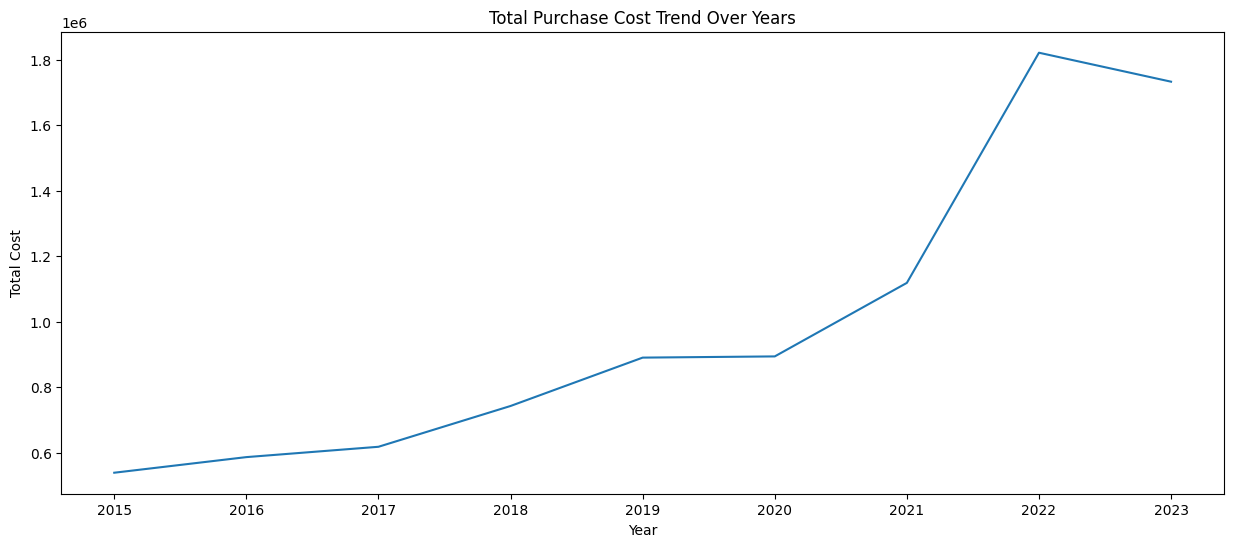

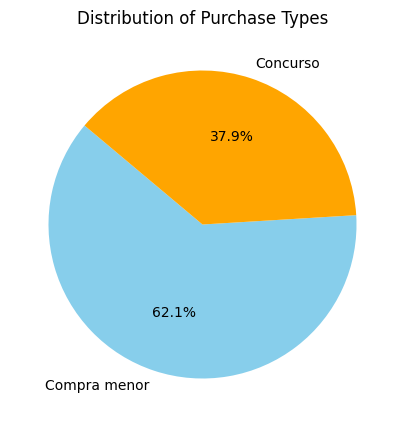

In [9]:

# Detailed Exploratory Data Analysis (EDA)
# -----------------------------------------
# Purchase cost trends over time
purchase_cost_trend = data.groupby(data['FECHAPEDIDO'].dt.year)['IMPORTELINEA'].sum()
plt.figure(figsize=(15, 6))
purchase_cost_trend.plot(kind='line')
plt.title('Total Purchase Cost Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.show()

# Purchase types distribution
purchase_types = data['TIPOCOMPRA'].value_counts()
plt.figure(figsize=(10, 5))
purchase_types.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Purchase Types')
plt.ylabel('')
plt.show()


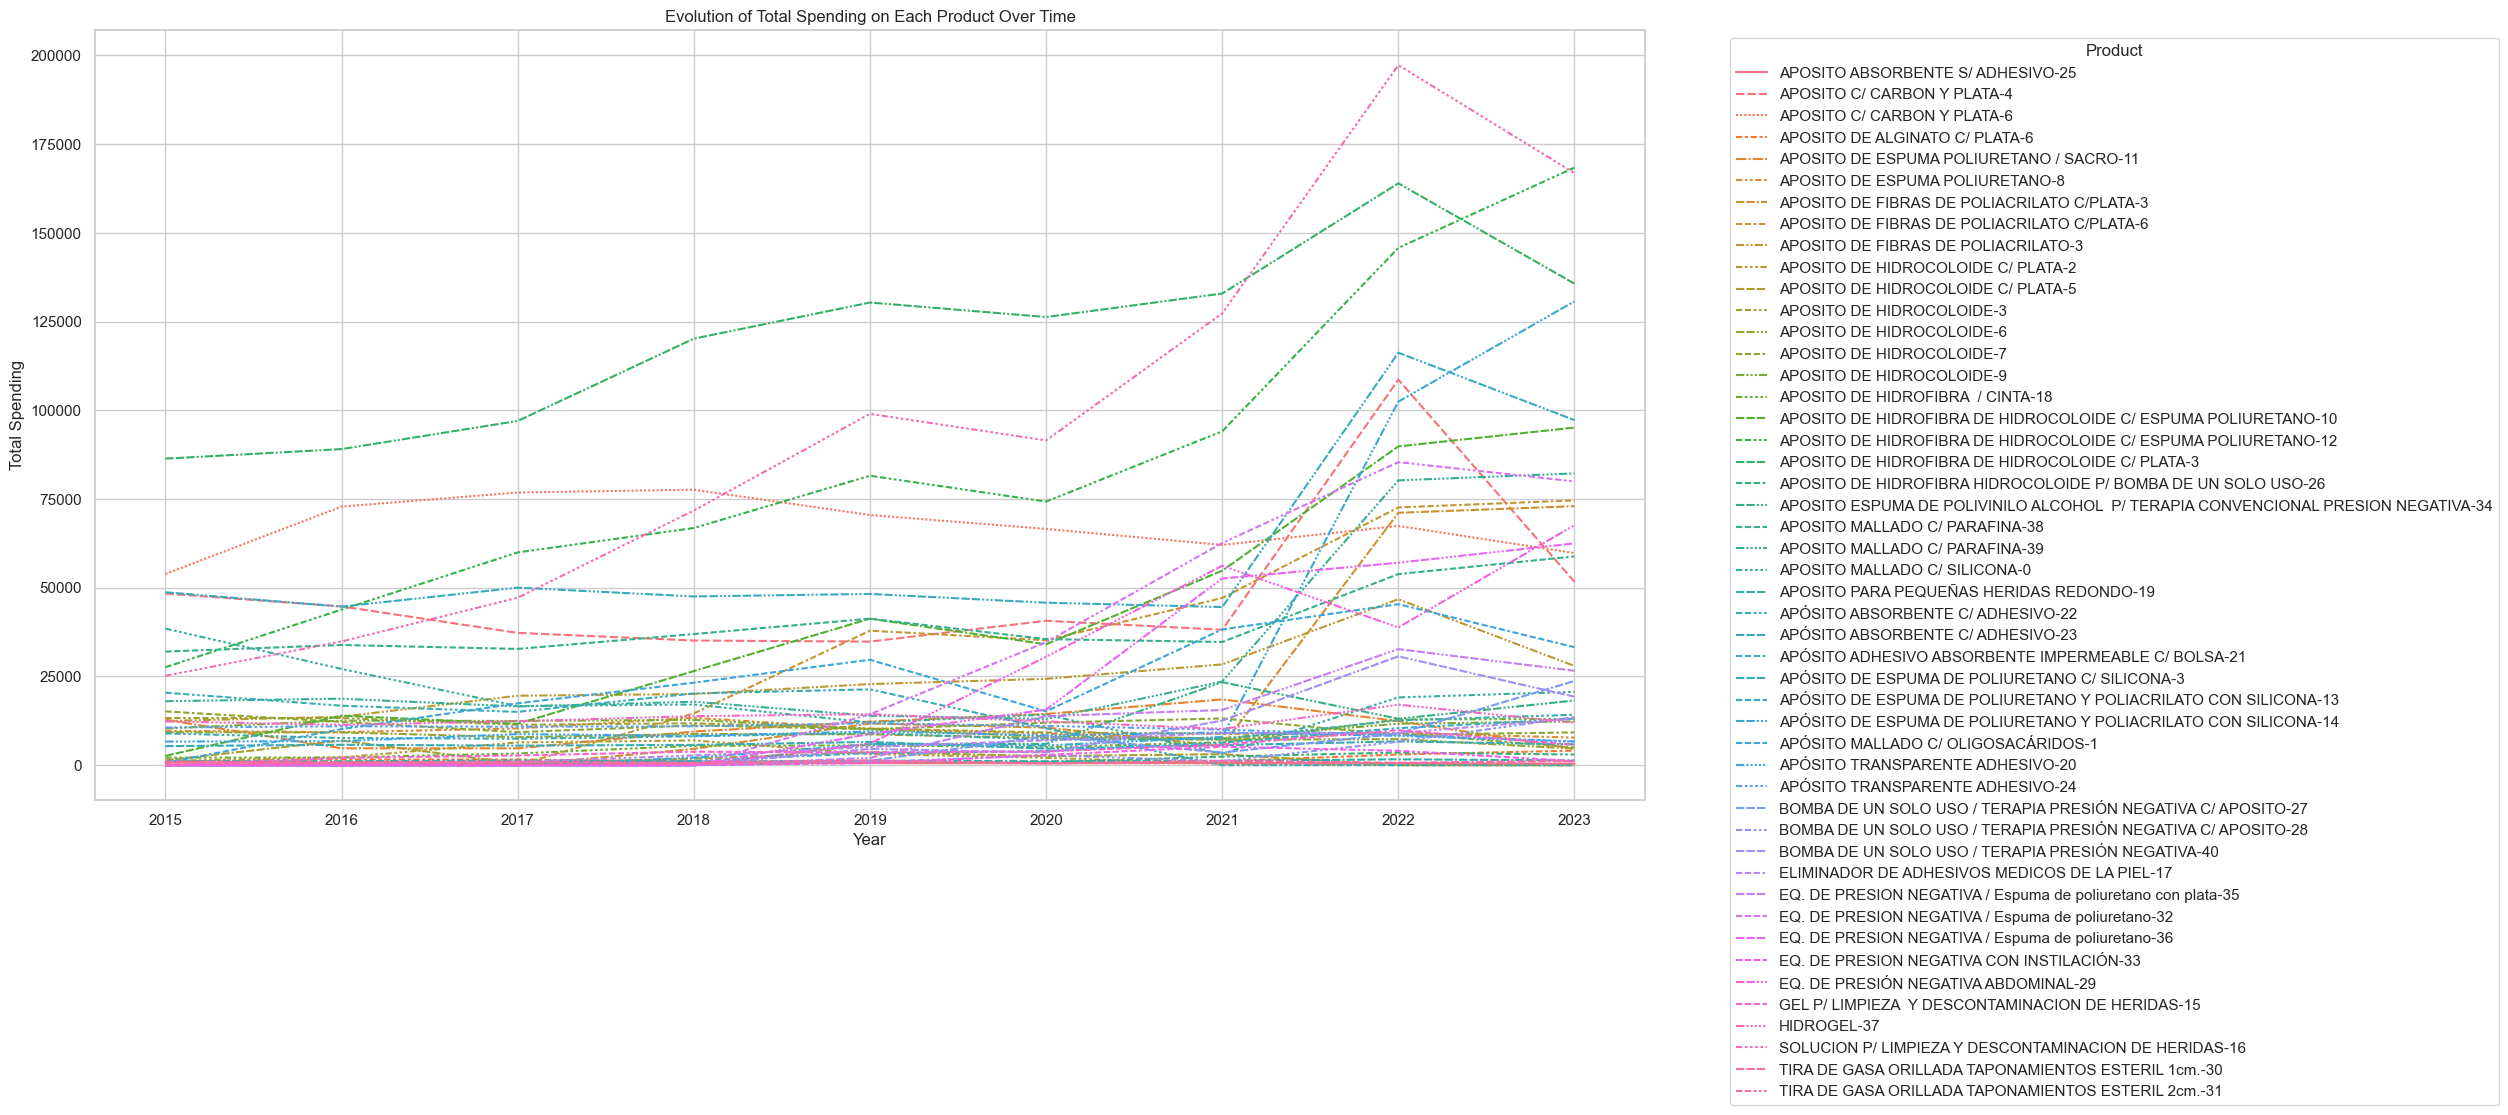

In [10]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set(style="whitegrid")

# Summing the total spent on each product over time
product_spending = data.groupby(['PRODUCTO', data['FECHAPEDIDO'].dt.year])['IMPORTELINEA'].sum().unstack().fillna(0)

# Plotting
plt.figure(figsize=(20, 10))
sns.lineplot(data=product_spending.T)
plt.title('Evolution of Total Spending on Each Product Over Time')
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Pattern Detection

In [ ]:

# Pattern Detection (Placeholder)
# --------------------------------
# This section will include clustering or association rule mining
# to uncover hidden patterns in purchasing behavior.


## Environmental Impact Assessment

In [ ]:

# Environmental Impact Assessment (Placeholder)
# ----------------------------------------------
# This section will assess the environmental impact of different purchasing strategies,
# focusing on transportation and storage implications.


## Summary and Recommendations

In [ ]:

# Summary and Recommendations
# ----------------------------
# This section will summarize the key findings from the analysis and
# provide actionable recommendations for the purchase plan.
